In [ ]:
import pandas as pd

files = ['makan_v3_interpolated.csv', 'sakit_v3_interpolated.csv', 'tolong_v3_interpolated.csv', 'toilet_v3_interpolated.csv', 'haus_v3_interpolated.csv']

dataframes = []
labels = []

for file in files:
    df = pd.read_csv(file, header=None, sep=',', skiprows=1)

    # Pisahkan kolom terakhir sebagai label
    label = df.iloc[:, -1]  # Ambil kolom terakhir
    data = df.iloc[:, :-1]  # Ambil semua kecuali kolom terakhir

    dataframes.append(data)
    labels.append(label)

# Cari dataframe dengan jumlah kolom terbanyak dari bagian data saja
df_max_cols = max(dataframes, key=lambda df: df.shape[1])
max_columns = df_max_cols.shape[1]

# Gunakan angka 1, 2, 3, ..., max_columns sebagai nama kolom
column_names = list(range(1, max_columns + 1))

# Pastikan semua dataframe hanya berisi data tanpa label
dataframes = [df.iloc[:, :-1].reindex(columns=range(max_columns), fill_value=0) for df in dataframes]

merged_data = pd.concat(dataframes, axis=0, ignore_index=True)
merged_labels = pd.concat(labels, axis=0, ignore_index=True)

# Set nama kolom
merged_data.columns = column_names

# Tambahkan kembali label sebagai kolom terakhir
merged_data.insert(len(column_names), "Label", merged_labels)

# Tambahkan kembali label sebagai kolom terakhir
merged_data["Label"] = merged_labels

# Simpan hasilnya ke CSV
merged_data.to_csv("merged_data_cleaned.csv", index=False)


# Tampilkan hasil
merged_data.head(50000)

# # # Simpan hasilnya ke CSV
# merged_data.to_csv("merged_data.csv", index=False)

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,Label
0,84,188.0,42.0,388.0,288.0,434.0,403.0,426.0,157.0,284.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A
1,223,423.0,176.0,219.0,311.0,196.0,319.0,76.0,273.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A
2,407,476.0,323.0,396.0,288.0,338.0,219.0,126.0,334.0,307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A
3,238,246.0,334.0,307.0,388.0,384.0,323.0,423.0,292.0,423.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A
4,326,423.0,207.0,361.0,215.0,353.0,69.0,38.0,107.0,323.0,...,234.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,146,161.0,65.0,215.0,142.0,253.0,253.0,296.0,173.0,265.0,...,134.0,215.0,188.0,173.0,0.0,0.0,0.0,0.0,0,E
2441,288,319.0,296.0,384.0,319.0,238.0,142.0,226.0,46.0,134.0,...,134.0,215.0,188.0,173.0,0.0,0.0,0.0,0.0,0,E
2442,388,219.0,419.0,296.0,373.0,276.0,196.0,69.0,215.0,146.0,...,134.0,215.0,188.0,173.0,0.0,0.0,0.0,0.0,0,E
2443,484,303.0,338.0,419.0,315.0,396.0,323.0,276.0,273.0,396.0,...,134.0,215.0,188.0,173.0,0.0,0.0,0.0,0.0,0,E


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv("merged_data_cleaned.csv")  # Ganti dengan path dataset yang benar

# Pisahkan fitur dan label
X = df.drop(columns=["Label"])  # Semua kolom kecuali label
y = df["Label"]  # Kolom label


In [ ]:
# Pisahkan dataset menjadi 70% training, 15% validation, dan 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp, shuffle=True
)


In [ ]:

# Standardisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [ ]:
# Prediksi Training
y_train_pred = rf_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prediksi Validation
y_val_pred = rf_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Prediksi Testing
y_test_pred = rf_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output hasil
print(f"Akurasi Training: {train_accuracy:.4f}")
print(f"Akurasi Validation: {val_accuracy:.4f}")
print(f"Akurasi Testing: {test_accuracy:.4f}")

# Classification Report Testing
print("\nClassification Report Testing:")
print(classification_report(y_test, y_test_pred))

Akurasi Training: 0.9895
Akurasi Validation: 0.8992
Akurasi Testing: 0.9183

Classification Report Testing:
              precision    recall  f1-score   support

           A       0.96      0.96      0.96        74
           B       0.84      0.89      0.87        73
           C       0.93      0.96      0.95        73
           D       0.99      0.97      0.98        74
           E       0.87      0.81      0.84        73

    accuracy                           0.92       367
   macro avg       0.92      0.92      0.92       367
weighted avg       0.92      0.92      0.92       367



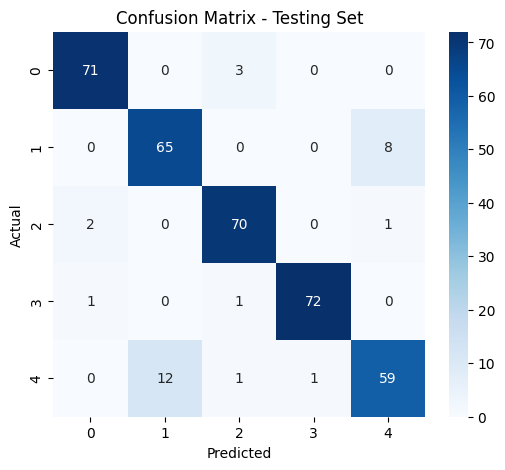

In [ ]:
# Confusion Matrix Testing
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Testing Set")
plt.show()

In [ ]:
def manual_input_prediction(model, scaler, input_data):
    """
    Memprediksi label berdasarkan input data yang diberikan dalam bentuk list atau array.

    Parameters:
    - model: Model yang telah dilatih (RandomForestClassifier)
    - scaler: StandardScaler yang telah di-fit
    - input_data: List atau array berisi nilai fitur yang akan diprediksi
    """
    # Konversi input ke numpy array dan lakukan scaling
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)

    # Prediksi label
    prediction = model.predict(input_scaled)

    # Output hasil prediksi
    print("\n✅ Hasil Prediksi:")
    print(f"Model memprediksi data ini termasuk ke dalam kategori: **{prediction[0]}**")


In [ ]:
input_data = [
    323, 338, 407, 419, 488, 369, 376, 365, 265, 219,
    388, 369, 261, 288, 242, 207, 246, 231.6667, 228.8,
    347.6154, 204.3333, 285.3818, 0, 0, 0, 0, 0, 0, 0, 0
]

manual_input_prediction(rf_model, scaler, input_data)



✅ Hasil Prediksi:
Model memprediksi data ini termasuk ke dalam kategori: **E**


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

model_data = {
    "model": rf_model,
    "scaler": scaler
}

joblib.dump(model_data, "model.pkl")


['model.pkl']